In [1]:
import tensorflow as tf
import numpy as np
import sys

from magenta.common import tf_lib

In [2]:
from magenta.models.rl_tuner import rl_tuner
from magenta.models.rl_tuner import rl_tuner_ops

In [3]:
rl_tuner_hparams = tf_lib.HParams(random_action_probability=0.1,    
                               store_every_nth=1,
                               train_every_nth=5,
                               minibatch_size=32,
                               discount_rate=0.5,
                               max_experience=100000,
                               target_network_update_rate=0.01)

In [4]:
SAVE_PATH = "/home/andrew/Git/rl_comps/g/"

In [5]:
# Model parameter settings
ALGORITHM = 'g' # G-Learning: regularises value estimates by penalising deterministic policies early in the learning process (Fox et al 2012)
REWARD_SCALER = 1.0 # The weight placed on music theory rewards, i.e. r_MT * reward_scalar. 
OUTPUT_EVERY_NTH = 50000 # The number of steps before the model evaluates itself and stores a checkpoint
NUM_NOTES_IN_COMPOSITION = 300
PRIME_WITH_MIDI = False

In [6]:
g_rl_net = rl_tuner.RLTuner(SAVE_PATH, 
                          dqn_hparams=rl_tuner_hparams, 
                          algorithm=ALGORITHM,
                          reward_scaler=REWARD_SCALER,
                          output_every_nth=OUTPUT_EVERY_NTH,
                          num_notes_in_melody=NUM_NOTES_IN_COMPOSITION) #,
                          #note_rnn_checkpoint_dir=SAVE_PATH,
                          #note_rnn_checkpoint_file="g.ckpt-950000")

Retrieving checkpoint of Note RNN from Magenta download server.
INFO:tensorflow:Initializing q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope q_network
Instructions for updating:
Please use tf.global_variables instead.
INFO:tensorflow:Initializing target q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope target_q_network
Instructions for updating:
Please use tf.global_variables instead.
INFO:tensorflow:Initializing reward network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope reward_rnn
Instructions for updating:
Please use tf.global_variables instead.
INFO:tensorflow:Q network cell: <tensorflow.python.ops.rnn_cell.MultiRNNCell object at 0x7fbe6a0a4310>
INFO:tensorflow:Adding RL graph variables
INFO:tensorflow:Adding reward computation portion of the graph
INFO:tensorflow:Adding taking action portion of graph
Instructions for updating:


In [7]:
g_rl_net.restore_from_directory(directory=SAVE_PATH, checkpoint_name="g.ckpt-950000") 

Attempting to restore from checkpoint /home/andrew/Git/rl_comps/g/g.ckpt-950000
INFO:tensorflow:Attempting to restore from checkpoint /home/andrew/Git/rl_comps/g/g.ckpt-950000


INFO:tensorflow:Priming with note 34
INFO:tensorflow:Generated sequence: [5, 24, 24, 24, 35, 35, 32, 21, 35, 35, 35, 35, 21, 37, 37, 37, 25, 3, 21, 3, 3, 13, 13, 13, 13, 13, 13, 16, 13, 8, 16, 13, 13, 16, 21, 35, 35, 9, 21, 3, 37, 37, 21, 37, 37, 13, 13, 9, 9, 10, 21, 3, 10, 10, 13, 13, 13, 13, 21, 37, 37, 37, 21, 29, 29, 3, 6, 17, 2, 2, 2, 2, 2, 26, 2, 26, 2, 26, 2, 6, 2, 6, 6, 6, 6, 6, 37, 6, 21, 37, 10, 34, 13, 10, 10, 10, 17, 17, 10, 10, 23, 3, 10, 21, 3, 3, 32, 21, 3, 3, 31, 31, 10, 10, 10, 21, 3, 35, 35, 16, 23, 8, 10, 32, 12, 12, 13, 10, 10, 10, 10, 10, 9, 10, 24, 10, 11, 11, 21, 35, 35, 35, 6, 16, 14, 16, 16, 21, 3, 37, 24, 21, 3, 37, 3, 3, 29, 37, 3, 14, 23, 3, 3, 31, 31, 31, 16, 35, 35, 23, 8, 29, 32, 16, 10, 35, 10, 35, 10, 1, 21, 32, 36, 36, 1, 16, 10, 23, 8, 17, 17, 17, 35, 35, 1, 16, 18, 16, 16, 18, 3, 6, 3, 3, 17, 16, 16, 6, 6, 6, 6, 13, 37, 37, 14, 14, 17, 17, 17, 17, 17, 6, 17, 21, 3, 3, 35, 16, 21, 3, 5, 5, 5, 35, 35, 35, 9, 0, 2, 21, 3, 29, 29, 29, 6, 6, 6, 30, 30, 6

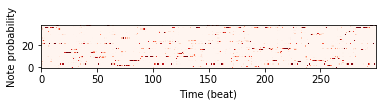

In [8]:
g_rl_net.generate_music_sequence(visualize_probs=True, title='my_g_rl')

In [ ]:
# Compute statistics about how well the model adheres to the music theory rules.
g_stat_dict = g_rl_net.evaluate_music_theory_metrics(num_compositions=100)